## Examples and applications

Now that we have gone through an overview of the all the parts that make up a variational algorithm and some instances, it is time to put them into practice.

Imagine that we want to use a variational algorithm to find the eigenvalues and eigenstates of the following observables:

$$
\hat{O}_1 = 
\begin{pmatrix} 
-1 & 0 & 0 & -5 \\
0 & 5 & 1 & 0 \\
0 & 1 & 5 & 0 \\
-5 & 0 & 0 & -1 \\
\end{pmatrix} = 2 II - 2 XX + 3 YY - 3 ZZ,
$$

with eigenvalues

$$
\left\{
\begin{array}{c}
\lambda_0 = -6 \\
\lambda_1 = 4 \\
\lambda_2 = 4 \\
\lambda_3 = 6
\end{array}
\right\},
$$

and eigenstates

$$
\left\{
\begin{array}{c}
|\phi_0\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)\\
|\phi_1\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)\\
|\phi_2\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)\\
|\phi_3\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)
\end{array}
\right\};
$$

In [1]:
from qiskit.quantum_info import SparsePauliOp

observable_1 = SparsePauliOp.from_list([
    ("II", 2),
    ("XX", -2),
    ("YY", 3),
    ("ZZ", -3)
])

and

$$
\hat{O}_2 = 
\begin{pmatrix} 
-2 & 0 & 0 & -5 \\
0 & 6 & -1 & 0 \\
0 & -1 & 6 & 0 \\
-5 & 0 & 0 & -2 \\
\end{pmatrix} = 2 II - 3 XX + 2 YY - 4 ZZ ,
$$

with eigenvalues

$$
\left\{
\begin{array}{c}
\lambda_0 = -7 \\
\lambda_1 = 3\\
\lambda_2 = 5 \\
\lambda_3 = 7
\end{array}
\right\},
$$

and eigenstates

$$
\left\{
\begin{array}{c}
|\phi_0\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)\\
|\phi_1\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)\\
|\phi_2\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)\\
|\phi_3\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)
\end{array}
\right\}.
$$

In [2]:
observable_2 = SparsePauliOp.from_list([
    ("II", 2),
    ("XX", -3),
    ("YY", 2),
    ("ZZ", -4)
])

For these examples we will use the following ansatz:

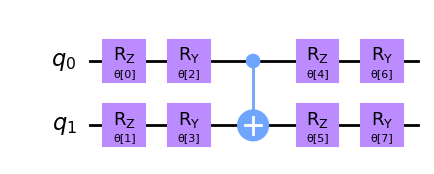

In [3]:
from qiskit.circuit.library import TwoLocal

ansatz = TwoLocal(2, rotation_blocks=['rz', 'ry'], entanglement_blocks='cx', entanglement='linear', reps=1)

ansatz.decompose().draw("mpl")

So, in this case, the variational parameters will be $\vec\theta \equiv (\theta_0, \theta_1, \cdots, \theta_7)$, and the circuit 

$$
U_A(\vec{\theta}) = 
[RY(\theta_7)RZ(\theta_5)\otimes RY(\theta_6)RZ(\theta_4)] 
\cdot CNOT_{0,1} \cdot 
[RY(\theta_3)RZ(\theta_1)\otimes RY(\theta_2)RZ(\theta_0)]
$$

Notice that the reference state $|\rho\rangle = |0\rangle$, which means that $U_R = I$, and $U_A(\vec\theta) = U_V(\vec\theta)$. In other words, that this ansatz is only made out of a variational form.

## VQE

In this first example, you will run VQE to find the lowest eigenvalue of the first observable $\hat{O}_1$ and look at all the output results. In order to initialize a Qiskit [VQE](https://qiskit.org/documentation/stubs/qiskit.algorithms.minimum_eigensolvers.VQE.html) object, you need to provide an `Estimator` instance, be it Terra's, Runtime's or any other implementation. It is also necessary to include the [ansatz](ansatz.ipynb) circuit and a classical [optimizer](optimization.ipynb). 

In this case we will use, Terra's [`Estimator`](https://qiskit.org/documentation/stubs/qiskit.primitives.Estimator.html#qiskit.primitives.Estimator) and the optimizer will be [`SLSQP`](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.SLSQP.html) (i.e. Sequential Least SQuares Programming). Additionally, we will set the initial point for the `SLSQP` optimizer to $\vec\theta_0 = (1, \cdots, 1)$.

In [4]:
from qiskit.primitives import Estimator
from qiskit.algorithms.optimizers import SLSQP
from qiskit.algorithms.minimum_eigensolvers import VQE
import numpy as np

estimator = Estimator()
optimizer = SLSQP()
vqe = VQE(estimator, ansatz, optimizer, initial_point=np.ones(8))

Now that we have initialized the `VQE` instance, we can get the results with the [`VQE.compute_minimum_eigenvalue`](https://qiskit.org/documentation/stubs/qiskit.algorithms.minimum_eigensolvers.VQE.compute_minimum_eigenvalue.html#qiskit.algorithms.minimum_eigensolvers.VQE.compute_minimum_eigenvalue) method. Let us look at the results.

In [6]:
result = vqe.compute_minimum_eigenvalue(observable_1)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 104,
    'eigenvalue': -5.999999934608512,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x12a12c150>,
    'optimal_parameters': {   ParameterVectorElement(θ[5]): 0.14160850307385317,
                              ParameterVectorElement(θ[3]): -6.416790728948547e-05,
                              ParameterVectorElement(θ[2]): 1.5708979652059711,
                              ParameterVectorElement(θ[6]): 0.2276422105623572,
                              ParameterVectorElement(θ[1]): 0.9999995021216439,
                              ParameterVectorElement(θ[4]): -0.141607089279231,
                              ParameterVectorElement(θ[0]): 0.9999998472848347,
                              ParameterVectorElement(θ[7]): 0.22774353601258496},
    'optimal_point': array([ 9.99999847e-01,  9.99999502e-01,  1.57089797e+00, -6.41679073e-05,
       -1.41607089e-01,  1.41608503e-01,  2.27642211

The [`VQEResult`](https://qiskit.org/documentation/stubs/qiskit.algorithms.minimum_eigensolvers.VQEResult.html) we obtain explains the following:
* `aux_operators_evaluated`: the expected values of any auxiliar operators we might include.
* `cost_function_evals`: Number of cost function evaluations.
* `eigenvalue`: the resulting eigenvalue.
* `optimal_circuit`: the parametrized circuit from which the solution was found. To find the eigenstates you have to bind the optimal values to the parameters.
* `optimal_parameters`: The set of optimal parameters as a dictionary
* `optimal_point`: an array with the optimal parameter values
* `optimal_value`: the optimal value of the cost function.
* `optimizer_evals`: number of optimizer evaluations.
* `optimizer_result`: results of the optimizer as an [`OptimizerResult`](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.OptimizerResult.html) object.
* `optimizer_time`: time used for optimization (in seconds).

Let us look at the `optimizer_result`:

In [8]:
print(result.optimizer_result)

{   'fun': -5.999999934608512,
    'jac': None,
    'nfev': 104,
    'nit': 11,
    'njev': 11,
    'x': array([ 9.99999847e-01,  9.99999502e-01,  1.57089797e+00, -6.41679073e-05,
       -1.41607089e-01,  1.41608503e-01,  2.27642211e-01,  2.27743536e-01])}


Here the parameters are:
* `fun`: the cost function value at the final step.
* `jac`: the final gradient of the minimization.
* `nfev`: number of cost function evaluations.
* `nit`: number of optimizer iterations.
* `njev`: number of gradient evaluations.
* `x`: parameter values at the final step.

Of all this information, however, the most important part is the eigenvalue. Let us compare it with the theoretical value:

In [22]:
from numpy.linalg import eigvalsh

eigenvalues = eigvalsh(observable_1.to_matrix())
min_eigenvalue = eigenvalues[0]

print("EIGENVALUES:")
print(f"  - Theoretical: {min_eigenvalue}.")
print(f"  - VQE: {result.eigenvalue}")
print(f"Percent error >> {abs((result.eigenvalue - min_eigenvalue)/min_eigenvalue):.2e}")

EIGENVALUES:
  - Theoretical: -6.0.
  - VQE: -5.999999934608512
Percent error >> 1.09e-08


As you can see, the result is extremely close to the ideal.

However, we still haven't looked at the eigenstates, since they were not part of `results`. For this purpose, let us bind the optimal parameter values `result.optimal_parameters` to `results.optimal_circuit` and define a [Statevector](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html) from that bound (i.e. non-parametrized) circuit.

In [33]:
from qiskit.quantum_info import Statevector

optimal_circuit = result.optimal_circuit.bind_parameters(result.optimal_parameters)
optimal_vector = Statevector.from_instruction(optimal_circuit)

rounded_optimal_vector = np.round(optimal_vector.data, 3)
print(f"EIGENSTATE: {rounded_optimal_vector}")

EIGENSTATE: [ 0.382-0.595j -0.   +0.j     0.   -0.j     0.382-0.595j]


This result does not seem too close to the theoretical one of $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \equiv [\frac{1}{\sqrt{2}},0,0,\frac{1}{\sqrt{2}}]$. However, notice that eigenvectors ar defined up to a constant factor. Furthermore, quantum states are always normalized and equivalent up to a global phase, so we can easily verify that these two statevectors are equivalent.

In [32]:
from numpy.linalg import eigh

_, eigenvectors = eigh(observable_1.to_matrix())
min_eigenvector = eigenvectors.T[0]  # Note: transpose to extract by index

optimal_vector.equiv(min_eigenvector, atol=1e-4)

True

We can conclude that the state we obtained is equivalent to the ideal one up to $10^{-4}$.

### Add reference state

In the previous example we have not used any reference operator $U_R$. Now let us think about how the ideal eigenstate $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ can be obtained. Consider the following circuit.

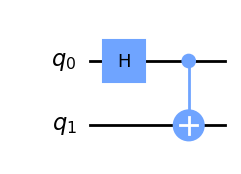

In [34]:
from qiskit import QuantumCircuit

ideal_qc = QuantumCircuit(2)
ideal_qc.h(0)
ideal_qc.cx(0,1)

ideal_qc.draw("mpl")

We can quickly check that this circuit gives us the desired state.

In [35]:
Statevector.from_instruction(ideal_qc)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


Now that we have seen how a circuit preparing the solution state looks like, it seems reasonable to use a Hadamard gate as a reference circuit, so that the full ansatz becomes:

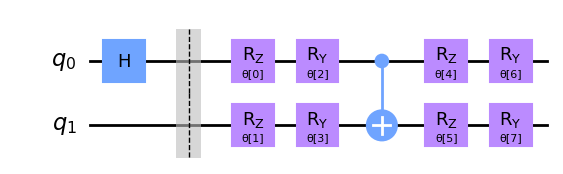

In [40]:
reference = QuantumCircuit(2)
reference.h(0)
# Include barrier to separate reference from variational form
reference.barrier()

ref_ansatz = ansatz.decompose().compose(reference, front=True)

ref_ansatz.draw("mpl")

For this new circuit, the ideal solution could be reached with all the parameters set to $0$, so this confirms that the choice of reference circuit is reasonable.

Now let us compare the number of cost function evaluations, optimizer iterations and time taken with those of the previous attempt.

In [45]:
num_evaluations = result.cost_function_evals
num_iterations = result.optimizer_result.nit
time = result.optimizer_time

print("NO REFERENCE STATE:")
print(f"  - Number of evaluations: {num_evaluations}")
print(f"  - Number of iterations: {num_iterations}")
print(f"  - Time: {time:.5f} seconds")

NO REFERENCE STATE:
  - Number of evaluations: 104
  - Number of iterations: 11
  - Time: 0.21662 seconds


In [42]:
# You can change the ansatz of the already defined vqe object instead of creating a new one
vqe.ansatz = ref_ansatz

ref_result = vqe.compute_minimum_eigenvalue(observable_1)

In [57]:
num_evaluations_ref = ref_result.cost_function_evals
num_iterations_ref = ref_result.optimizer_result.nit
time_ref = ref_result.optimizer_time

print("ADDED REFERENCE STATE:")
print(f"  - Number of evaluations: {num_evaluations_ref}")
print(f"  - Number of iterations: {num_iterations_ref}")
print(f"  - Time: {time_ref:.5f} seconds")
print()

if num_evaluations_ref < num_evaluations:
    print(">> Number of cost function evaluations improved")
elif num_evaluations_ref > num_evaluations:
    print(">> Number of cost function evaluations worsened")
if num_iterations_ref < num_iterations:
    print(">> Number of iterations improved")
elif num_iterations_ref > num_iterations:
    print(">> Number of iterations worsened")
if time_ref < time:
    print(">> Time improved")
elif time_ref > time:
    print(">> Time worsened")


ADDED REFERENCE STATE:
  - Number of evaluations: 96
  - Number of iterations: 10
  - Time: 0.16970 seconds

>> Number of cost function evaluations improved
>> Time improved


However, how effective this is depends also on the choice of observable. Now let us solve the same problem as before but for the second observable $2 II - 3 XX + 2 YY - 4 ZZ$. As we have seen, the solution eigenstate is the same, except that the corresponding eigenvalue is now $-7$ instead of $-6$.

In [50]:
# Reset the ansatz
vqe.ansatz = ansatz

result = vqe.compute_minimum_eigenvalue(observable_2)

Before comparing the results before and after the reference state, let us check whether the eigenvalue we obtain is close to the ideal one.

In [51]:
eigenvalues = eigvalsh(observable_2.to_matrix())
min_eigenvalue = eigenvalues[0]

print("EIGENVALUES:")
print(f"  - Theoretical: {min_eigenvalue}.")
print(f"  - VQE: {result.eigenvalue}")
print(f"Percent error >> {abs((result.eigenvalue - min_eigenvalue)/min_eigenvalue):.2e}")

EIGENVALUES:
  - Theoretical: -7.0.
  - VQE: -6.99999997050242
Percent error >> 4.21e-09


In [53]:
num_evaluations = result.cost_function_evals
num_iterations = result.optimizer_result.nit
time = result.optimizer_time

print("NO REFERENCE STATE:")
print(f"  - Number of evaluations: {num_evaluations}")
print(f"  - Number of iterations: {num_iterations}")
print(f"  - Time: {time:.5f} seconds")

NO REFERENCE STATE:
  - Number of evaluations: 97
  - Number of iterations: 10
  - Time: 0.21051 seconds


In [54]:
vqe.ansatz = ref_ansatz

ref_result = vqe.compute_minimum_eigenvalue(observable_2)

In [56]:
num_evaluations_ref = ref_result.cost_function_evals
num_iterations_ref = ref_result.optimizer_result.nit
time_ref = ref_result.optimizer_time

print("ADDED REFERENCE STATE:")
print(f"  - Number of evaluations: {num_evaluations_ref}")
print(f"  - Number of iterations: {num_iterations_ref}")
print(f"  - Time: {time_ref:.5f} seconds")
print()

if num_evaluations_ref < num_evaluations:
    print(">> Number of cost function evaluations improved")
elif num_evaluations_ref > num_evaluations:
    print(">> Number of cost function evaluations worsened")
if num_iterations_ref < num_iterations:
    print(">> Number of iterations improved")
elif num_iterations_ref > num_iterations:
    print(">> Number of iterations worsened")
if time_ref < time:
    print(">> Time improved")
elif time_ref > time:
    print(">> Time worsened")

ADDED REFERENCE STATE:
  - Number of evaluations: 96
  - Number of iterations: 10
  - Time: 0.16970 seconds

>> Number of cost function evaluations improved
>> Time improved


### Change initial point

Now that we have seen the effect of adding the reference state, we will go into what happens when we choose different initial points $\vec{\theta_0}$. In particular we will use $\vec{\theta_0}=(0,0,0,0,6,0,0,0)$ and $\vec{\theta_0}=(6,6,6,6,6,6,6,6,6)$. Remember that, as discussed when the reference state was introduced, the ideal solution would be found when all the parameters are $0$, so the first initial point should give fewer evaluations, iterations and time.

In [70]:
vqe.initial_point = [0,0,0,0,6,0,0,0]

result = vqe.compute_minimum_eigenvalue(observable_1)

num_evaluations = result.cost_function_evals
num_iterations = result.optimizer_result.nit
time = result.optimizer_time

print(f"INITIAL POINT: {vqe.initial_point}")
print(f"  - Number of evaluations: {num_evaluations}")
print(f"  - Number of iterations: {num_iterations}")
print(f"  - Time: {time:.5f} seconds")

INITIAL POINT: [0, 0, 0, 0, 6, 0, 0, 0]
  - Number of evaluations: 29
  - Number of iterations: 3
  - Time: 0.07153 seconds


In [71]:
vqe.initial_point = 6*np.ones(8)

result = vqe.compute_minimum_eigenvalue(observable_1)

num_evaluations = result.cost_function_evals
num_iterations = result.optimizer_result.nit
time = result.optimizer_time

print(f"INITIAL POINT: {vqe.initial_point}")
print(f"  - Number of evaluations: {num_evaluations}")
print(f"  - Number of iterations: {num_iterations}")
print(f"  - Time: {time:.5f} seconds")

INITIAL POINT: [6. 6. 6. 6. 6. 6. 6. 6.]
  - Number of evaluations: 70
  - Number of iterations: 7
  - Time: 0.22412 seconds


## VQD example

Now instead of looking for only the lowest eigenvalue of our observables, we will look for all $4$. Following the notation from the previous chapter (as well as that from Qiskit's [VQD](https://qiskit.org/documentation/stubs/qiskit.algorithms.eigensolvers.VQD.html) class), that means $k=4$.

Remember that the cost functions of VQD are:

$$
C_{l}(\vec{\theta}) := 
\langle \psi(\vec{\theta}) | \hat{H} | \psi(\vec{\theta})\rangle + 
\sum_{j=0}^{l-1}\beta_j |\langle \psi(\vec{\theta})| \psi(\vec{\theta^j})\rangle  |^2 
\quad \forall l\in\{1,\cdots,k\}=\{1,\cdots,4\}
$$

This is particularly important because a vector $\vec{\beta}=(\beta_0,\cdots,\beta_{k-1})$ (in this case $(\beta_0, \beta_1, \beta_2, \beta_3)$) must be passed as an argument when we define the `VQD` object.

Also, in Qiskit's implementation of VQD, instead of considering the effective observables described in the previous notebook, the fidelities $|\langle \psi(\vec{\theta})| \psi(\vec{\theta^j})\rangle  |^2$ are calculated directly via the [`ComputeUncompute`](https://qiskit.org/documentation/stubs/qiskit.algorithms.state_fidelities.ComputeUncompute.html) algorithm, that leverages a `Sampler` primitive to sample the probability of obtaining $|0\rangle$ for the circuit
$U_A^\dagger(\vec{\theta})U_A(\vec{\theta^j})$. This works precisely because this probability is
$$p_0 = |\langle 0|U_A^\dagger(\vec{\theta})U_A(\vec{\theta^j})|0\rangle|^2 =  |\big(\langle 0|U_A^\dagger(\vec{\theta})\big)\big(U_A(\vec{\theta^j})|0\rangle\big)|^2 = |\langle \psi(\vec{\theta}) |\psi(\vec{\theta^j}) \rangle|^2.$$

Finally, to try out a new optimizer, let us use [`COBYLA`](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.COBYLA.html) instead instead of `SLSQP`.

In [72]:
from qiskit.primitives import Sampler
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit.algorithms.eigensolvers import VQD

optimizer = COBYLA()
sampler = Sampler()
fidelity = ComputeUncompute(sampler)

k = 4
betas = [40, 60, 30, 30]

vqd = VQD(estimator, fidelity, ansatz, optimizer, k=k, betas=betas)

As the only API difference from the previous examples, notice that instead of calling the `VQE.compute_minimum_eigenvalue` method, we will call [`VQD.compute_eigenvalues`](https://qiskit.org/documentation/stubs/qiskit.algorithms.eigensolvers.VQD.compute_eigenvalues.html).

This time we will examine first the second observable, $\hat{O}_2 := 2 II - 3 XX + 2 YY - 4 ZZ$. The reasoning behind this will become apparent later.

In [73]:
result = vqd.compute_eigenvalues(observable_2)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': array([ 123,  331, 1000,  146]),
    'eigenvalues': array([-6.99999994+0.j,  3.00000005+0.j,  5.00005101+0.j,  7.00019314+0.j]),
    'optimal_circuits': [   <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x1435004d0>,
    'optimal_parameters': [   {   ParameterVectorElement(θ[5]): 6.118084883235053,
                                  ParameterVectorElement(θ[3]): -6.283152997469988,
                                  ParameterVectorElement(θ[2]): -4.712385176745006,
                                  ParameterVectorElement(θ[6]): 5.281919722176651,
                                  ParameterVectorElement(θ[1]): 5.150624721880258,
                                  ParameterVectorElement(θ[4]): 6.448231075853032,
                                  ParameterVectorElement(θ[0]): 5.766926854476973,
                                  ParameterVectorElement(θ[7]): -1.001378417207258},
                              {   Pa

The [VQDResult](https://qiskit.org/documentation/stubs/qiskit.algorithms.eigensolvers.VQDResult.html) we obtain is completely analogous to the `VQEResult`. It only differs in that each attribute is a list whose $i$-th element corresponds to the $i$-th eigenvalue.

Now that we have seen the eigenvalues, let us compare the experimental eigenvectors with the theoretical ones:

In [84]:
optimal_circuits = [
    circuit.bind_parameters(parameters)
    for circuit, parameters in zip(result.optimal_circuits, result.optimal_parameters)
]
eigenstates = [Statevector.from_instruction(c) for c in optimal_circuits]

for i, (eigenvalue, eigenstate) in enumerate(zip(result.eigenvalues, eigenstates)):
    eigenvalue = eigenvalue.real
    eigenstate = np.round(eigenstate.data, 3).tolist()
    print(f"RESULT {i}:")
    print(f"  - {eigenvalue = :.3f}")
    print(f"  - {eigenstate = }")

RESULT 0:
  - eigenvalue = -7.000
  - eigenstate = [(-0.48-0.519j), (-0-0j), 0j, (-0.48-0.519j)]
RESULT 1:
  - eigenvalue = 3.000
  - eigenstate = [(-0.266-0.655j), (-0-0j), (-0-0j), (0.266+0.655j)]
RESULT 2:
  - eigenvalue = 5.000
  - eigenstate = [-0j, (-0.318-0.635j), (-0.315-0.629j), (-0+0j)]
RESULT 3:
  - eigenvalue = 7.000
  - eigenstate = [(0.001-0j), (-0.622+0.332j), (0.626-0.334j), (-0.001+0.001j)]


These results are the same as the expected ones except from a small approximation error and global phase.

Now let us solve this problem for the first observable $\hat{O}_1 := 2 II - 2 XX + 3 YY - 3 ZZ$.

In [85]:
result = vqd.compute_eigenvalues(observable_1)

## PRINT
optimal_circuits = [
    circuit.bind_parameters(parameters)
    for circuit, parameters in zip(result.optimal_circuits, result.optimal_parameters)
]
eigenstates = [Statevector.from_instruction(c) for c in optimal_circuits]

for i, (eigenvalue, eigenstate) in enumerate(zip(result.eigenvalues, eigenstates)):
    eigenvalue = eigenvalue.real
    eigenstate = np.round(eigenstate.data, 3).tolist()
    print(f"RESULT {i}:")
    print(f"  - {eigenvalue = :.3f}")
    print(f"  - {eigenstate = }")

RESULT 0:
  - eigenvalue = -6.000
  - eigenstate = [(0.405+0.579j), 0j, (-0+0j), (0.405+0.579j)]
RESULT 1:
  - eigenvalue = 4.000
  - eigenstate = [(0.015+0.041j), (-0.26-0.656j), (0.26+0.656j), (-0.017-0.04j)]
RESULT 2:
  - eigenvalue = 4.009
  - eigenstate = [(0.587+0.385j), (0.06-0.015j), (-0.011-0.059j), (-0.59-0.389j)]
RESULT 3:
  - eigenvalue = 5.993
  - eigenstate = [(0.033-0.032j), (0.444+0.547j), (0.442+0.551j), (-0.04+0.028j)]


Here the eigenstates corresponding to $\lambda_1 = \lambda_2 = 4$ are not the same as the expected ones: $|\phi_1\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$ and $|\phi_2\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$. This happens precisely because as $\lambda_1=\lambda_2$, any complex linear combination of those $\alpha_1 |\phi_1\rangle + \alpha_2 |\phi_2\rangle = \frac{1}{\sqrt{2}}(\alpha_1 |00\rangle + \alpha_2 |01\rangle - \alpha_2 |10\rangle - \alpha_1 |11\rangle)\equiv \frac{1}{\sqrt{2}}[\alpha_1, \alpha_2, -\alpha_2, -\alpha_1]$ is also a eigenstate with the same eigenvalue. That is exactly what we are seeing with these results.

## Change betas

As mentioned in the instances chapter, the values of $\vec{\beta}$ should be bigger than the difference between eigenvalues. Let us see what happens when they do not verify that condition.

In [86]:
vqd.betas = np.ones(4)
result = vqd.compute_eigenvalues(observable_2)

## PRINT
optimal_circuits = [
    circuit.bind_parameters(parameters)
    for circuit, parameters in zip(result.optimal_circuits, result.optimal_parameters)
]
eigenstates = [Statevector.from_instruction(c) for c in optimal_circuits]

for i, (eigenvalue, eigenstate) in enumerate(zip(result.eigenvalues, eigenstates)):
    eigenvalue = eigenvalue.real
    eigenstate = np.round(eigenstate.data, 3).tolist()
    print(f"RESULT {i}:")
    print(f"  - {eigenvalue = :.3f}")
    print(f"  - {eigenstate = }")

RESULT 0:
  - eigenvalue = -7.000
  - eigenstate = [(0.672+0.219j), 0j, (-0-0j), (0.672+0.219j)]
RESULT 1:
  - eigenvalue = -6.000
  - eigenstate = [(0.611+0.356j), 0j, 0j, (0.611+0.356j)]
RESULT 2:
  - eigenvalue = -5.000
  - eigenstate = [(0.653-0.272j), (-0-0j), 0j, (0.653-0.272j)]
RESULT 3:
  - eigenvalue = -4.000
  - eigenstate = [(0.616+0.348j), (-0-0j), 0j, (0.616+0.347j)]


This time, the optimizer returns the same state $|\phi_0\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ as proposed solution to all eigenstates: which is clearly wrong. This happens because the betas were too small to penalize the minimum eigenstate in the successive cost functions; therefore, it was not excluded from the effective search space in later iterations of the algorithm, and always chosen as the best possible solution.

## Variational algorithms with Qiskit Runtime

In [100]:
## I'm following this how-to guide https://qiskit.org/documentation/partners/qiskit_ibm_runtime/how_to/noisy_simulators.html
## the idea is to use runtime with noisy simulator.


from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum")

In [95]:
service.backends()

[<IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibmq_montreal')>,
 <IBMBackend('ibmq_toronto')>,
 <IBMBackend('ibmq_kolkata')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibmq_guadalupe')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_cairo')>,
 <IBMBackend('ibm_auckland')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibm_washington')>,
 <IBMBackend('ibm_oslo')>,
 <IBMBackend('ibm_geneva')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_stabilizer')>]

In [101]:
# use the simulator

backend = service.backend("ibmq_qasm_simulator")

In [102]:
from qiskit.providers.fake_provider import FakeManilaV2
from qiskit_aer.noise import NoiseModel

#create noise model from the backend

fake_backend = FakeManilaV2()
noise_model = NoiseModel.from_backend(fake_backend)

In [103]:
from qiskit_ibm_runtime import Options

options = Options()
print(options)

Options(optimization_level=3, resilience_level=1, max_execution_time=None, transpilation=TranspilationOptions(skip_transpilation=False, initial_layout=None, layout_method=None, routing_method=None, approximation_degree=None), resilience=ResilienceOptions(noise_amplifier='TwoQubitAmplifier', noise_factors=(1, 3, 5), extrapolator='LinearExtrapolator'), execution=ExecutionOptions(shots=4000, init_qubits=True), environment=EnvironmentOptions(log_level='WARNING', callback=None, job_tags=[]), simulator=SimulatorOptions(noise_model=None, seed_simulator=None, coupling_map=None, basis_gates=None))


In [104]:
# set options to use the noise model

options.simulator = {
    "noise_model": noise_model,
    "basis_gates": fake_backend.operation_names,
    "coupling_map": list(fake_backend.coupling_map),
    "seed_simulator": 42
}

# had to refactor the coupling map as a list because otherwise I get error.

options.optimization_level=0
options.resilience_level=0

In [105]:
from qiskit_ibm_runtime import Estimator as RuntimeEstimator
from qiskit_ibm_runtime import Session

# Run VQE with the simulator. Using noise model and specifications from ManilaV2
with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session, options=options)
    vqe = VQE(estimator, ansatz, optimizer, initial_point=np.ones(8))
    result=vqe.compute_minimum_eigenvalue(observable_1)
    session.close()

print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 91,
    'eigenvalue': -2.8925,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f8d7957be80>,
    'optimal_parameters': {   ParameterVectorElement(θ[4]): 0.32419132053191113,
                              ParameterVectorElement(θ[1]): 0.8001889538327664,
                              ParameterVectorElement(θ[2]): 1.5339954103827056,
                              ParameterVectorElement(θ[0]): 0.9820731075362733,
                              ParameterVectorElement(θ[7]): 1.1199174549721211,
                              ParameterVectorElement(θ[6]): 1.0016097479707406,
                              ParameterVectorElement(θ[5]): -0.4646049074996886,
                              ParameterVectorElement(θ[3]): -0.09376326172651375},
    'optimal_point': array([ 0.98207311,  0.80018895,  1.53399541, -0.09376326,  0.32419132,
       -0.46460491,  1.00160975,  1.11991745]),
    'optimal_value

In [37]:
from qiskit.quantum_info import Statevector
opt_qc = result.optimal_circuit.bind_parameters(result.optimal_parameters)

opt_vector = Statevector.from_instruction(opt_qc)

print(f"The lowest eigenvalue obtained with the noisy backend is {result.eigenvalue} and its statevector is {opt_vector}.\n The ideal eigenvalue is {-6} and its eigenvector is {[1,0,0,1]/np.sqrt(2)}")

The lowest eigenvalue obtained with the noisy backend is -2.8925 and its statevector is Statevector([ 0.48156116-0.55750713j, -0.00430923+0.0539958j ,
              0.067192  +0.00612773j,  0.4027422 -0.53628066j],
            dims=(2, 2)).
 The ideal eigenvalue is -6 and its eigenvector is [0.70710678 0.         0.         0.70710678]


In [38]:
# Now I set optimization level from 0 to 3

options.optimization_level=3

In [39]:
with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session, options=options)
    vqe = VQE(estimator, ansatz, optimizer, initial_point=np.ones(8))
    result=vqe.compute_minimum_eigenvalue(observable_1)
    session.close()

#results are worse?
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 109,
    'eigenvalue': -2.114,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f8d4a617df0>,
    'optimal_parameters': {   ParameterVectorElement(θ[4]): 0.4255628733597645,
                              ParameterVectorElement(θ[1]): 1.6544916184480472,
                              ParameterVectorElement(θ[2]): 1.7515580196365972,
                              ParameterVectorElement(θ[0]): 0.9815603580918606,
                              ParameterVectorElement(θ[7]): 1.0325870598971691,
                              ParameterVectorElement(θ[6]): 0.571965339112318,
                              ParameterVectorElement(θ[5]): -0.03588440681458477,
                              ParameterVectorElement(θ[3]): 0.4293629817469658},
    'optimal_point': array([ 0.98156036,  1.65449162,  1.75155802,  0.42936298,  0.42556287,
       -0.03588441,  0.57196534,  1.03258706]),
    'optimal_value': 

In [40]:
opt_qc = result.optimal_circuit.bind_parameters(result.optimal_parameters)

opt_vector = Statevector.from_instruction(opt_qc)

print(f"The lowest eigenvalue obtained with the noisy backend is {result.eigenvalue} and its statevector is {opt_vector}.\n The ideal eigenvalue is {-6} and its eigenvector is {[1,0,0,1]/np.sqrt(2)}")

The lowest eigenvalue obtained with the noisy backend is -2.114 and its statevector is Statevector([ 0.05537087-0.51523551j, -0.08189146+0.06527286j,
             -0.07060588-0.22350256j,  0.31278807-0.75347509j],
            dims=(2, 2)).
 The ideal eigenvalue is -6 and its eigenvector is [0.70710678 0.         0.         0.70710678]


In [43]:
# now increase resilience from 0 to 2
# if I try setting it to 3 I get a big error

# TLDR: optimization level 3 and resilience level 2.

options.resilience_level=2

In [44]:
with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session, options=options)
    vqe = VQE(estimator, ansatz, optimizer, initial_point=np.ones(8))
    result=vqe.compute_minimum_eigenvalue(observable_1)
    session.close()

#results improved but very close to the noisy ones without mitigation
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 83,
    'eigenvalue': -2.923708333333334,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f8d88c45c10>,
    'optimal_parameters': {   ParameterVectorElement(θ[4]): -0.6335036061459515,
                              ParameterVectorElement(θ[1]): 0.938422873789936,
                              ParameterVectorElement(θ[2]): 2.0155502986375167,
                              ParameterVectorElement(θ[0]): 2.571870785017809,
                              ParameterVectorElement(θ[7]): 0.7661055675182433,
                              ParameterVectorElement(θ[6]): 0.5827886981503744,
                              ParameterVectorElement(θ[5]): 0.2027088136074269,
                              ParameterVectorElement(θ[3]): 0.43306167578186194},
    'optimal_point': array([ 2.57187079,  0.93842287,  2.0155503 ,  0.43306168, -0.63350361,
        0.20270881,  0.5827887 ,  0.76610557]),
    'optima

In [45]:
opt_qc = result.optimal_circuit.bind_parameters(result.optimal_parameters)

opt_vector = Statevector.from_instruction(opt_qc)

print(f"The lowest eigenvalue obtained with the noisy backend is {result.eigenvalue} and its statevector is {opt_vector}.\n The ideal eigenvalue is {-6} and its eigenvector is {[1,0,0,1]/np.sqrt(2)}")

The lowest eigenvalue obtained with the noisy backend is -2.923708333333334 and its statevector is Statevector([-0.00221264-0.46476089j,  0.02506441+0.01250652j,
              0.12609586-0.06683508j, -0.31360759-0.81516316j],
            dims=(2, 2)).
 The ideal eigenvalue is -6 and its eigenvector is [0.70710678 0.         0.         0.70710678]


In [46]:
# Increase shots from 4000 to 15000

options.execution.shots = 15000

In [47]:
with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session, options=options)
    vqe = VQE(estimator, ansatz, optimizer, initial_point=np.ones(8))
    result=vqe.compute_minimum_eigenvalue(observable_1)
    session.close()

# Results are actually worse
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 106,
    'eigenvalue': -2.11067777777778,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f8d4ac58940>,
    'optimal_parameters': {   ParameterVectorElement(θ[4]): 0.48089587876282636,
                              ParameterVectorElement(θ[1]): 0.6484453878422833,
                              ParameterVectorElement(θ[2]): 1.597114007716419,
                              ParameterVectorElement(θ[0]): 2.0405870548887526,
                              ParameterVectorElement(θ[7]): 0.7555445275574956,
                              ParameterVectorElement(θ[6]): 0.5306666537159748,
                              ParameterVectorElement(θ[5]): -0.4573584952061418,
                              ParameterVectorElement(θ[3]): 0.1324424199027691},
    'optimal_point': array([ 2.04058705,  0.64844539,  1.59711401,  0.13244242,  0.48089588,
       -0.4573585 ,  0.53066665,  0.75554453]),
    'optim

In [48]:
opt_qc = result.optimal_circuit.bind_parameters(result.optimal_parameters)

opt_vector = Statevector.from_instruction(opt_qc)

print(f"The lowest eigenvalue obtained with the noisy backend is {result.eigenvalue} and its statevector is {opt_vector}.\n The ideal eigenvalue is {-6} and its eigenvector is {[1,0,0,1]/np.sqrt(2)}")

The lowest eigenvalue obtained with the noisy backend is -2.11067777777778 and its statevector is Statevector([ 0.14578419-0.65252591j,  0.00444431+0.0531297j ,
             -0.00122714-0.10950252j,  0.17362176-0.71272545j],
            dims=(2, 2)).
 The ideal eigenvalue is -6 and its eigenvector is [0.70710678 0.         0.         0.70710678]


In [53]:
# the state seemed fine at first sight even though the eigenvalue given by estimator was not.
# I'll compare the result of estimator for the optimal statevector for the noisy and noiseless estimators.

# Noisy gives a very bad result

with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session, options=options)
    resultado=estimator.run(opt_qc, observable_1).result()
    session.close()

print(resultado)

EstimatorResult(values=array([-2.11223333]), metadata=[{'zne': {'noise_amplification': {'noise_amplifier': "<TwoQubitAmplifier:{'noise_factor_relative_tolerance': 0.01, 'random_seed': None, 'sub_folding_option': 'from_first'}>", 'noise_factors': [1, 3, 5], 'values': [-2.9354666666666667, -2.7429333333333332, -4.757200000000001], 'variance': [13.585477155555557, 14.234941048888889, 6.278696799999999], 'shots': [15000, 15000, 15000]}, 'extrapolation': {'extrapolator': 'LinearExtrapolator'}}}])


In [54]:
# noiseless gives a reasonable one (close to the ideal of -6) for the exact same state

with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session)
    resultado=estimator.run(opt_qc, observable_1).result()
    session.close()

print(resultado)

EstimatorResult(values=array([-5.7845]), metadata=[{'variance': 1.1220907500000008, 'shots': 4000, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}])


----------------------

-----------------

In [ ]:
## Here I repeat everything for FakeManila instead of FakeManilaV2
## following this how-to guide https://qiskit.org/documentation/partners/qiskit_ibm_runtime/how_to/noisy_simulators.html

In [57]:
from qiskit.providers.fake_provider import FakeManila
from qiskit_aer.noise import NoiseModel

fake_backend = FakeManila()
noise_model = NoiseModel.from_backend(fake_backend)

In [62]:
from qiskit_ibm_runtime import Options

options = Options()
print(options)

Options(optimization_level=3, resilience_level=1, max_execution_time=None, transpilation=TranspilationOptions(skip_transpilation=False, initial_layout=None, layout_method=None, routing_method=None, approximation_degree=None), resilience=ResilienceOptions(noise_amplifier='TwoQubitAmplifier', noise_factors=(1, 3, 5), extrapolator='LinearExtrapolator'), execution=ExecutionOptions(shots=4000, init_qubits=True), environment=EnvironmentOptions(log_level='WARNING', callback=None, job_tags=[]), simulator=SimulatorOptions(noise_model=None, seed_simulator=None, coupling_map=None, basis_gates=None))


In [63]:
options.simulator = {
    "noise_model": noise_model,
    "basis_gates": fake_backend.configuration().basis_gates,
    "coupling_map": fake_backend.configuration().coupling_map,
    "seed_simulator": 42
}

options.optimization_level=0
options.resilience_level=0

In [64]:
from qiskit_ibm_runtime import Estimator as RuntimeEstimator
from qiskit_ibm_runtime import Session

with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session, options=options)
    vqe = VQE(estimator, ansatz, optimizer, initial_point=np.ones(8))
    result=vqe.compute_minimum_eigenvalue(observable_1)
    session.close()

print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 94,
    'eigenvalue': -3.176,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f8d4a74b700>,
    'optimal_parameters': {   ParameterVectorElement(θ[4]): -0.4665827093417174,
                              ParameterVectorElement(θ[1]): 0.5477959316826215,
                              ParameterVectorElement(θ[2]): 1.370788426817056,
                              ParameterVectorElement(θ[0]): 0.5915888215126729,
                              ParameterVectorElement(θ[7]): 0.5015213611611776,
                              ParameterVectorElement(θ[6]): 0.5622207907084168,
                              ParameterVectorElement(θ[5]): 0.43501942583131187,
                              ParameterVectorElement(θ[3]): 0.028950711403947456},
    'optimal_point': array([ 0.59158882,  0.54779593,  1.37078843,  0.02895071, -0.46658271,
        0.43501943,  0.56222079,  0.50152136]),
    'optimal_value':

In [65]:
from qiskit.quantum_info import Statevector
opt_qc = result.optimal_circuit.bind_parameters(result.optimal_parameters)

opt_vector = Statevector.from_instruction(opt_qc)

print(f"The lowest eigenvalue obtained with the noisy backend is {result.eigenvalue} and its statevector is {opt_vector}.\n The ideal eigenvalue is {-6} and its eigenvector is {[1,0,0,1]/np.sqrt(2)}")

The lowest eigenvalue obtained with the noisy backend is -3.176 and its statevector is Statevector([0.64509145-0.4006265j , 0.05486349-0.03322671j,
             0.02521163-0.00378024j, 0.54039736-0.3557558j ],
            dims=(2, 2)).
 The ideal eigenvalue is -6 and its eigenvector is [0.70710678 0.         0.         0.70710678]


In [66]:
# increase optimization level from 0 to 3

options.optimization_level=3

In [67]:
with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session, options=options)
    vqe = VQE(estimator, ansatz, optimizer, initial_point=np.ones(8))
    result=vqe.compute_minimum_eigenvalue(observable_1)
    session.close()

# the result now is a lot better than when I did the same for V2. Why?
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 106,
    'eigenvalue': -4.92,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f8d88c1e340>,
    'optimal_parameters': {   ParameterVectorElement(θ[4]): 0.805423654478983,
                              ParameterVectorElement(θ[1]): 1.6233571333867338,
                              ParameterVectorElement(θ[2]): 1.2984005449852456,
                              ParameterVectorElement(θ[0]): 2.3252286893226737,
                              ParameterVectorElement(θ[7]): 0.3223537207814225,
                              ParameterVectorElement(θ[6]): 0.32040271407351006,
                              ParameterVectorElement(θ[5]): -0.628521397714879,
                              ParameterVectorElement(θ[3]): 0.11939707544341194},
    'optimal_point': array([ 2.32522869,  1.62335713,  1.29840054,  0.11939708,  0.80542365,
       -0.6285214 ,  0.32040271,  0.32235372]),
    'optimal_value': -

In [68]:
opt_qc = result.optimal_circuit.bind_parameters(result.optimal_parameters)

opt_vector = Statevector.from_instruction(opt_qc)

print(f"The lowest eigenvalue obtained with the noisy backend is {result.eigenvalue} and its statevector is {opt_vector}.\n The ideal eigenvalue is {-6} and its eigenvector is {[1,0,0,1]/np.sqrt(2)}")

The lowest eigenvalue obtained with the noisy backend is -4.92 and its statevector is Statevector([-0.36572788-0.68892233j, -0.01757804-0.05235329j,
             -0.07203698-0.03997119j, -0.19679434-0.58571687j],
            dims=(2, 2)).
 The ideal eigenvalue is -6 and its eigenvector is [0.70710678 0.         0.         0.70710678]


In [74]:
# increase resilience

options.resilience_level=2

In [75]:
with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session, options=options)
    vqe = VQE(estimator, ansatz, optimizer, initial_point=np.ones(8))
    result=vqe.compute_minimum_eigenvalue(observable_1)
    session.close()

# the result now is a lot worse!
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 94,
    'eigenvalue': -3.910208333333335,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f8da96a4610>,
    'optimal_parameters': {   ParameterVectorElement(θ[4]): 0.09057496143145971,
                              ParameterVectorElement(θ[1]): 0.8365992755447865,
                              ParameterVectorElement(θ[2]): 0.8634746908630936,
                              ParameterVectorElement(θ[0]): 1.1227730382899488,
                              ParameterVectorElement(θ[7]): 0.4756368035581716,
                              ParameterVectorElement(θ[6]): 0.1874815185784256,
                              ParameterVectorElement(θ[5]): -0.31985329820336456,
                              ParameterVectorElement(θ[3]): 0.02387590624703521},
    'optimal_point': array([ 1.12277304,  0.83659928,  0.86347469,  0.02387591,  0.09057496,
       -0.3198533 ,  0.18748152,  0.4756368 ]),
    'op

In [76]:
opt_qc = result.optimal_circuit.bind_parameters(result.optimal_parameters)

opt_vector = Statevector.from_instruction(opt_qc)

print(f"The lowest eigenvalue obtained with the noisy backend is {result.eigenvalue} and its statevector is {opt_vector}.\n The ideal eigenvalue is {-6} and its eigenvector is {[1,0,0,1]/np.sqrt(2)}")

The lowest eigenvalue obtained with the noisy backend is -3.910208333333335 and its statevector is Statevector([0.57290379-0.67435614j, 0.01193843+0.02116916j,
             0.12457245-0.13794706j, 0.19988431-0.37673991j],
            dims=(2, 2)).
 The ideal eigenvalue is -6 and its eigenvector is [0.70710678 0.         0.         0.70710678]


In [72]:
# see what happens when I set resilience level to 3

options.resilience_level=3

In [73]:
# this part is exactly the same again

with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session, options=options)
    vqe = VQE(estimator, ansatz, optimizer, initial_point=np.ones(8))
    result=vqe.compute_minimum_eigenvalue(observable_1)
    session.close()

print(result)

AlgorithmError: 'The primitive job to evaluate the energy failed!'

In [ ]:
opt_qc = result.optimal_circuit.bind_parameters(result.optimal_parameters)

opt_vector = Statevector.from_instruction(opt_qc)

print(f"The lowest eigenvalue obtained with the noisy backend is {result.eigenvalue} and its statevector is {opt_vector}.\n The ideal eigenvalue is {-6} and its eigenvector is {[1,0,0,1]/np.sqrt(2)}")

In [77]:
# increase shots

options.execution.shots = 15000

In [78]:
with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session, options=options)
    vqe = VQE(estimator, ansatz, optimizer, initial_point=np.ones(8))
    result=vqe.compute_minimum_eigenvalue(observable_1)
    session.close()


# result even worse
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 79,
    'eigenvalue': -3.530455555555557,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f8d58b00730>,
    'optimal_parameters': {   ParameterVectorElement(θ[4]): -0.5941830387015075,
                              ParameterVectorElement(θ[1]): 0.9634591328382499,
                              ParameterVectorElement(θ[2]): 0.7201775480366278,
                              ParameterVectorElement(θ[0]): 0.9387253145386416,
                              ParameterVectorElement(θ[7]): 0.44426499576891076,
                              ParameterVectorElement(θ[6]): 0.7271142882897971,
                              ParameterVectorElement(θ[5]): 0.3802244819746072,
                              ParameterVectorElement(θ[3]): 0.2433473016404783},
    'optimal_point': array([ 0.93872531,  0.96345913,  0.72017755,  0.2433473 , -0.59418304,
        0.38022448,  0.72711429,  0.444265  ]),
    'opti

In [ ]:
opt_qc = result.optimal_circuit.bind_parameters(result.optimal_parameters)

opt_vector = Statevector.from_instruction(opt_qc)

print(f"The lowest eigenvalue obtained with the noisy backend is {result.eigenvalue} and its statevector is {opt_vector}.\n The ideal eigenvalue is {-6} and its eigenvector is {[1,0,0,1]/np.sqrt(2)}")

In [79]:
# lower optimization level to 0

options.optimization_level=0

In [80]:
with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session, options=options)
    vqe = VQE(estimator, ansatz, optimizer, initial_point=np.ones(8))
    result=vqe.compute_minimum_eigenvalue(observable_1)
    session.close()

# not a big difference. A bit worse
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 107,
    'eigenvalue': -3.31958888888889,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f8d4a815ee0>,
    'optimal_parameters': {   ParameterVectorElement(θ[4]): -0.465030350306802,
                              ParameterVectorElement(θ[1]): 0.6606167234714537,
                              ParameterVectorElement(θ[2]): 1.2267561184038476,
                              ParameterVectorElement(θ[0]): -0.13408626544127303,
                              ParameterVectorElement(θ[7]): 0.5014534441699836,
                              ParameterVectorElement(θ[6]): 0.4658237392007962,
                              ParameterVectorElement(θ[5]): 0.42244167392445314,
                              ParameterVectorElement(θ[3]): -0.07623532071876048},
    'optimal_point': array([-0.13408627,  0.66061672,  1.22675612, -0.07623532, -0.46503035,
        0.42244167,  0.46582374,  0.50145344]),
    'o

In [81]:
# lower resilience from 2 to 1

options.resilience_level=1

In [82]:
with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session, options=options)
    vqe = VQE(estimator, ansatz, optimizer, initial_point=np.ones(8))
    result=vqe.compute_minimum_eigenvalue(observable_1)
    session.close()

# why is it better now?
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 86,
    'eigenvalue': -4.968478947596811,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f8d58a99f70>,
    'optimal_parameters': {   ParameterVectorElement(θ[4]): 0.64756080818463,
                              ParameterVectorElement(θ[1]): 0.38397649630622405,
                              ParameterVectorElement(θ[2]): 1.3412562384743458,
                              ParameterVectorElement(θ[0]): 2.5734495593907707,
                              ParameterVectorElement(θ[7]): 0.3775292356101593,
                              ParameterVectorElement(θ[6]): 0.3236246685817745,
                              ParameterVectorElement(θ[5]): -0.6115356255109299,
                              ParameterVectorElement(θ[3]): -0.13823400381242829},
    'optimal_point': array([ 2.57344956,  0.3839765 ,  1.34125624, -0.138234  ,  0.64756081,
       -0.61153563,  0.32362467,  0.37752924]),
    'opti

----------------------

-----------------

In [ ]:
from qiskit_ibm_runtime import Sampler as RuntimeSampler

with Session(service=service, backend=backend) as session:
    estimator = RuntimeEstimator(session=session)
    
    sampler = RuntimeSampler(session=session)
    fidelity = ComputeUncompute(sampler)


    vqd = VQD(estimator, fidelity, ansatz, optimizer, k=k, betas=betas)
    result=vqd.compute_eigenvalues(observable_2)

# An eigenvalue of 16??? The highest eigenvalue for that observable was 7. It should be completely impossible to get 16

print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': array([ 89, 106, 110,  96]),
    'eigenvalues': array([-6.9715+0.j,  3.0375+0.j,  7.0155+0.j, 16.8305+0.j]),
    'optimal_circuits': [   <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x7f9b52f3dca0>,
    'optimal_parameters': [   {   ParameterVectorElement(θ[7]): -6.258393199511491,
                                  ParameterVectorElement(θ[3]): -3.1747207110168403,
                                  ParameterVectorElement(θ[2]): 1.606302781520952,
                                  ParameterVectorElement(θ[6]): -3.158999706087004,
                                  ParameterVectorElement(θ[5]): 5.123093414274128,
                                  ParameterVectorElement(θ[1]): -0.5805412927591446,
                                  ParameterVectorElement(θ[0]): -4.106291493790551,
                                  ParameterVectorElement(θ[4]): 2.0194991566981884},
                              {   ParameterVecto

In [ ]:
estimator.options

Options(optimization_level=3, resilience_level=1, max_execution_time=None, transpilation={'skip_transpilation': False, 'initial_layout': None, 'layout_method': None, 'routing_method': None, 'approximation_degree': None}, resilience={'noise_amplifier': 'TwoQubitAmplifier', 'noise_factors': (1, 3, 5), 'extrapolator': 'LinearExtrapolator'}, execution={'shots': 4000, 'init_qubits': True}, environment={'log_level': 'WARNING', 'callback': None, 'job_tags': []}, simulator={'noise_model': None, 'seed_simulator': None, 'coupling_map': None, 'basis_gates': None})

In [ ]:
estimator.options.execution["shots"]

4000